In [1]:
import numpy as np
import pandas as pd
import nbimporter
from Kuramoto_dynamicalModels import *
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt

Importing Jupyter notebook from Kuramoto_dynamicalModels.ipynb


# Strong Coupling

In [2]:
# these are our constants
N = 5  # number of variables
K = 10 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=5
tinit = 0.0
tmax = 20.0
dt =  0.01

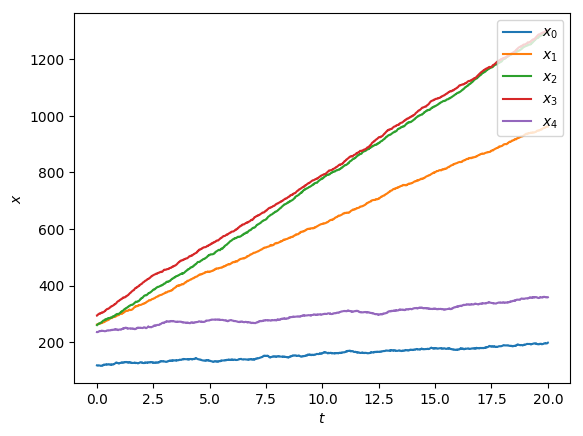

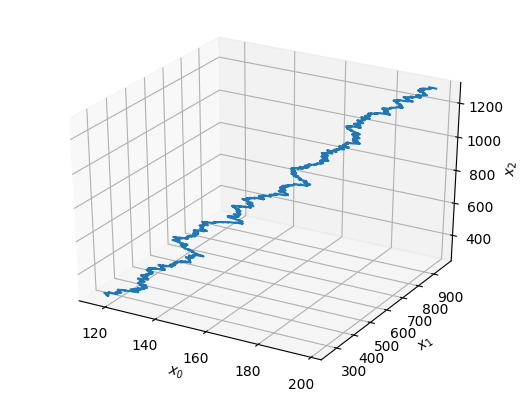

In [3]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [4]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
#kuramoto_df = kuramoto_df.transform([np.cos,np.sin])
#kuramoto_df.columns = [''.join(col).strip() for col in kuramoto_df.columns.values]

In [5]:
#kuramoto_df_wo_x0sin=kuramoto_df.drop(columns=['x0sin'])
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [6]:
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')

In [7]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.1100         3.841       0.740  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.04867         3.841       0.825  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.01828         3.841       0.892  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical

## Strong Coupling: Detrended

In [8]:
kuramoto_detrend_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_detrend_df = kuramoto_df.transform(detrend)
#kuramoto_df.columns = [''.join(col).strip() for col in kuramoto_df.columns.values]

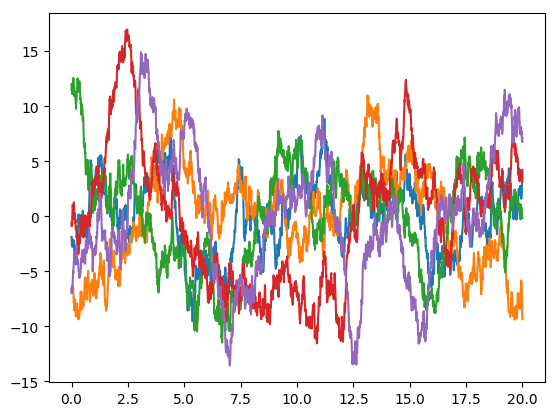

In [9]:
plt.plot(sol[0],kuramoto_detrend_df)
plt.show()

In [10]:
#kuramoto_df_wo_x0sin=kuramoto_df.drop(columns=['x0sin'])
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [11]:
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')

In [12]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.1100         3.841       0.740  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.04867         3.841       0.825  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.01828         3.841       0.892  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical

# Weak Coupling

In [13]:
# these are our constants
N = 5  # number of variables
K = 0.01 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=5
tinit = 0.0
tmax = 20.0
dt =  0.01

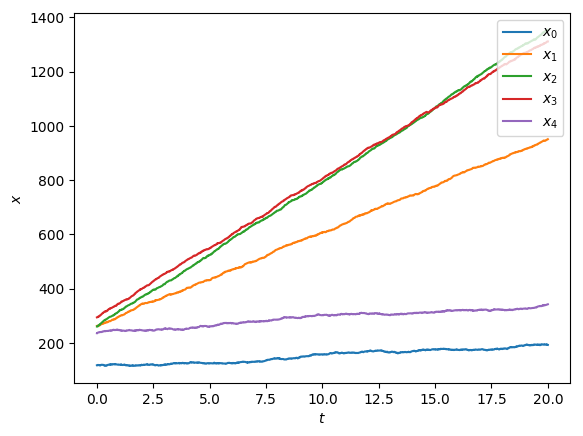

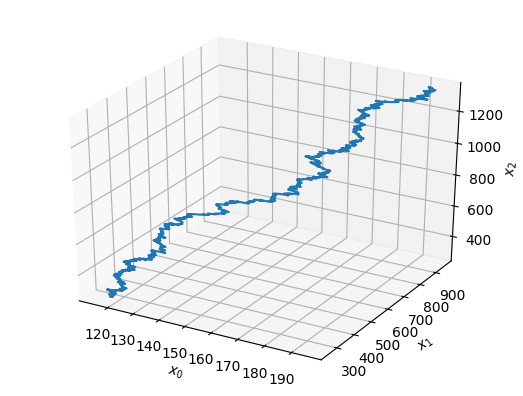

In [14]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, 20, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [15]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])

In [16]:
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [17]:
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')

In [18]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.063          3.841       0.044  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.4180         3.841       0.518  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    5.903          3.841       0.015  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value d

 ## Weak Coupling: Detrended

In [19]:
kuramoto_detrend_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_detrend_df = kuramoto_df.transform(detrend)
#kuramoto_df.columns = [''.join(col).strip() for col in kuramoto_df.columns.values]

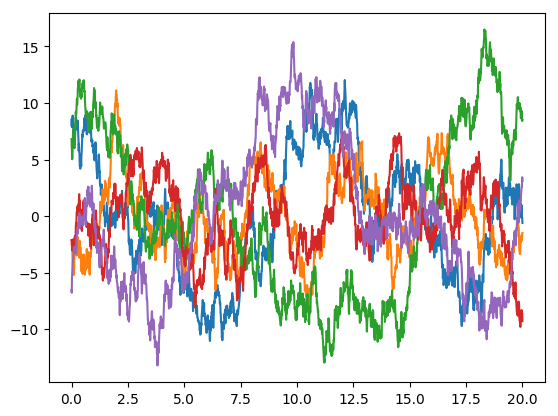

In [20]:
plt.plot(sol[0],kuramoto_detrend_df)
plt.show()

In [21]:
#kuramoto_df_wo_x0sin=kuramoto_df.drop(columns=['x0sin'])
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [22]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.063          3.841       0.044  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.4180         3.841       0.518  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    5.903          3.841       0.015  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value d

# No Coupling

In [23]:
# these are our constants
N = 5  # number of variables
K = 0.01 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=5
tinit = 0.0
tmax = 100.0
dt =  0.01

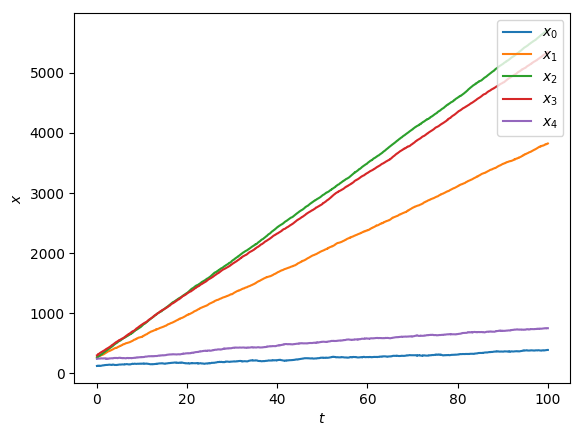

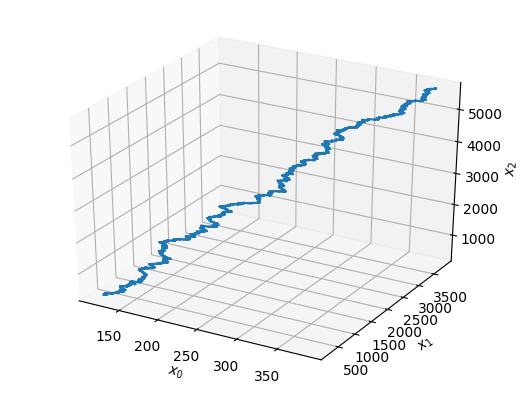

In [24]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [25]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])

In [26]:
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [27]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.063          3.841       0.044  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.4180         3.841       0.518  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    5.903          3.841       0.015  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value d

## No Coupling: Detrend

In [28]:
kuramoto_detrend_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_detrend_df = kuramoto_df.transform(detrend)
#kuramoto_df.columns = [''.join(col).strip() for col in kuramoto_df.columns.values]

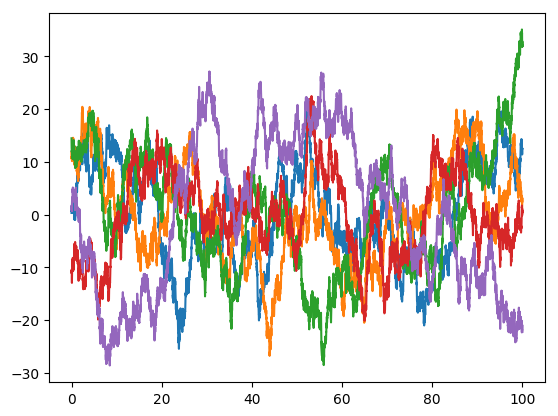

In [29]:
plt.plot(sol[0],kuramoto_detrend_df)
plt.show()

In [30]:
#kuramoto_df_wo_x0sin=kuramoto_df.drop(columns=['x0sin'])
model = VAR(kuramoto_df)
#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [31]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.063          3.841       0.044  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.4180         3.841       0.518  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    5.903          3.841       0.015  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value d